In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb

# Plotting settings
sns.set(style="whitegrid")


In [34]:
data = pd.read_csv("Energy_consumption.csv")

# Backup for raw data visualization (before encoding)
raw_data = data.copy()
data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [30]:



# Get the column names (features) in the order they appear
feature_order = data.columns.tolist()

# Print the feature order
print(feature_order)


['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday', 'EnergyConsumption', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']


In [31]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding
categorical_cols = ['HVACUsage', 'LightingUsage','DayOfWeek', 'Holiday']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))


In [33]:
# Summary statistics
data.describe(include='all')


,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Year,Month,Day,Hour,Minute,Second
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.0,1000.00000,1000.000000,1000.000000,1000.0,1000.0
unique,NaN,NaN,NaN,NaN,2,2,NaN,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Off,Off,NaN,Friday,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,508,509,NaN,164,533,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,24.982026,45.395412,1500.052488,4.581000,NaN,NaN,15.132813,NaN,NaN,77.055873,2022.0,1.25600,13.400000,11.436000,0.0,0.0
std,2.836850,8.518905,288.418873,2.865598,NaN,NaN,8.745917,NaN,NaN,8.144112,0.0,0.43664,9.037792,6.913009,0.0,0.0
min,20.007565,30.015975,1000.512661,0.000000,NaN,NaN,0.006642,NaN,NaN,53.263278,2022.0,1.00000,1.000000,0.000000,0.0,0.0
25%,22.645070,38.297722,1247.108548,2.000000,NaN,NaN,7.628385,NaN,NaN,71.544690,2022.0,1.00000,6.000000,5.000000,0.0,0.0
50%,24.751637,45.972116,1507.967426,5.000000,NaN,NaN,15.072296,NaN,NaN,76.943696,2022.0,1.00000,11.000000,11.000000,0.0,0.0
75%,27.418174,52.420066,1740.340165,7.000000,NaN,NaN,22.884064,NaN,NaN,82.921742,2022.0,2.00000,21.000000,17.000000,0.0,0.0


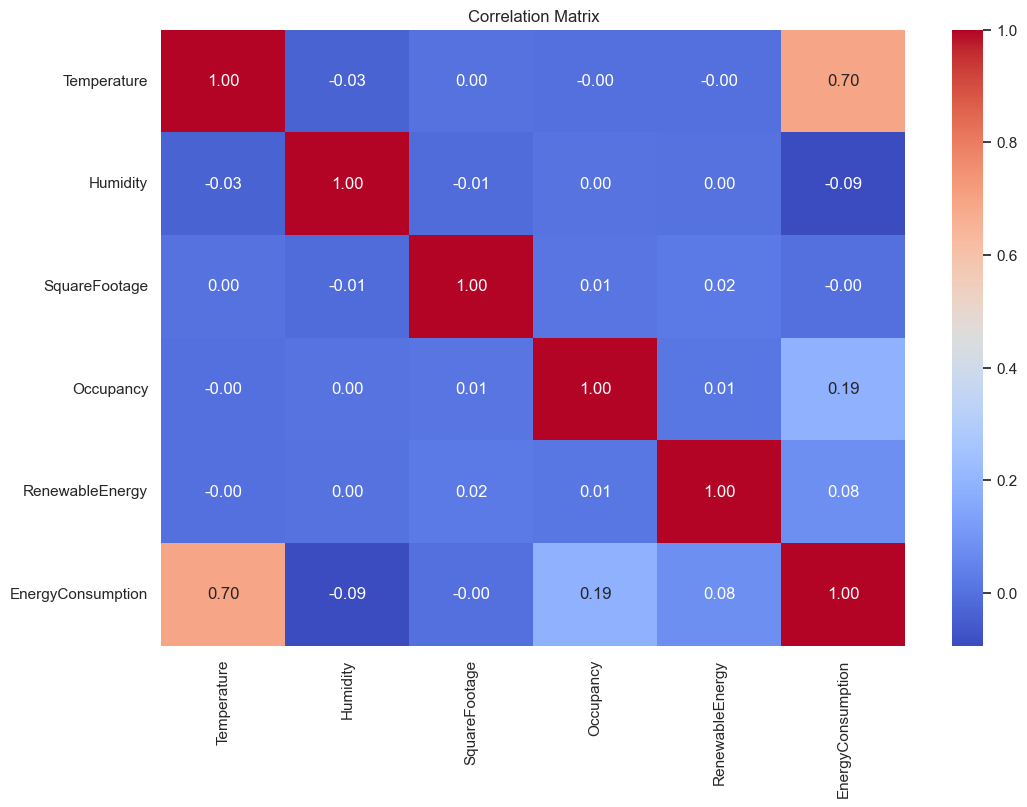

In [5]:
# Drop the non-numeric columns (like Timestamp) before correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


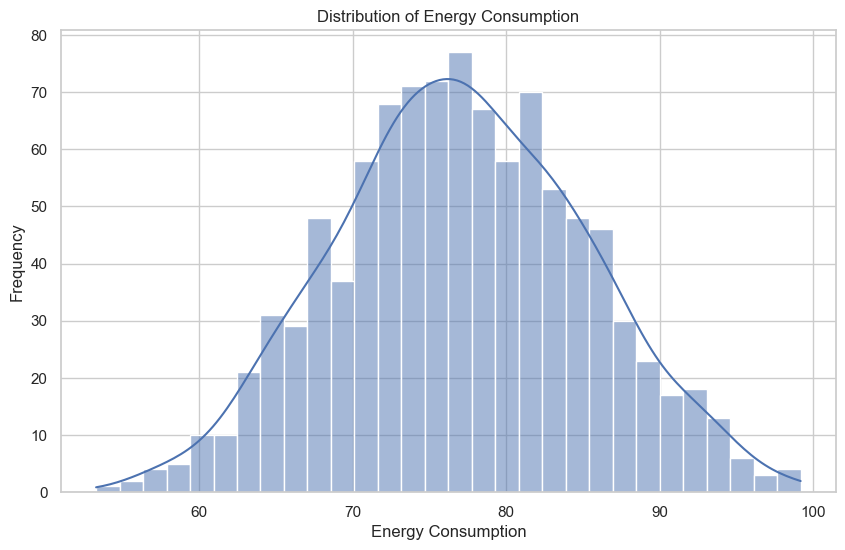

In [6]:
# Define 'y' (target variable) after preprocessing
y = data['EnergyConsumption']

# Plot the distribution of the target variable (Energy Consumption)
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Energy Consumption")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()


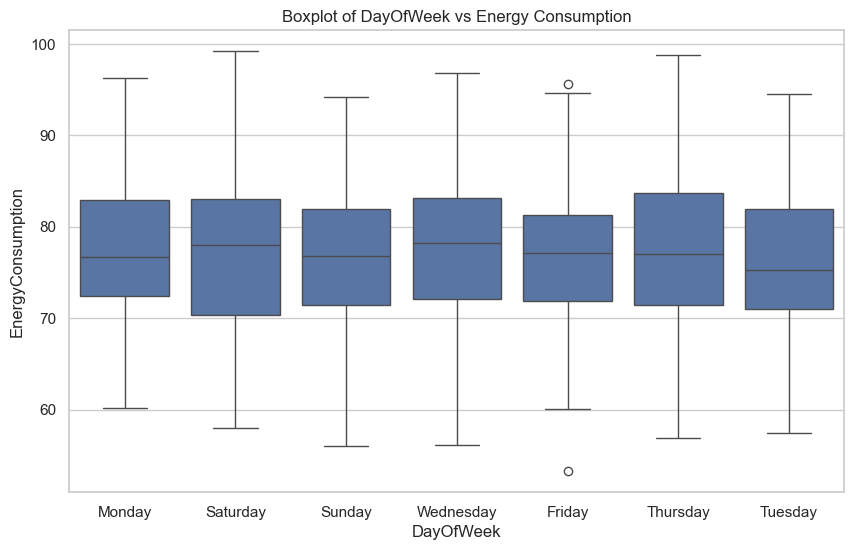

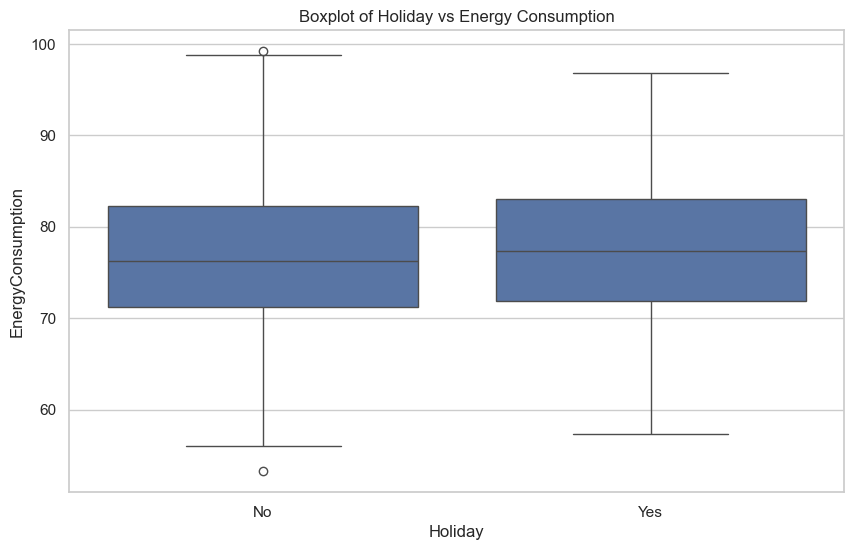

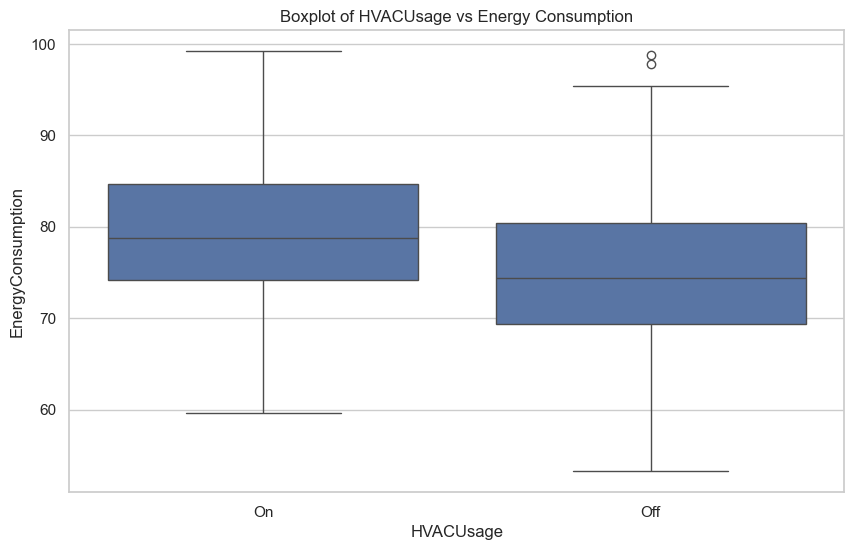

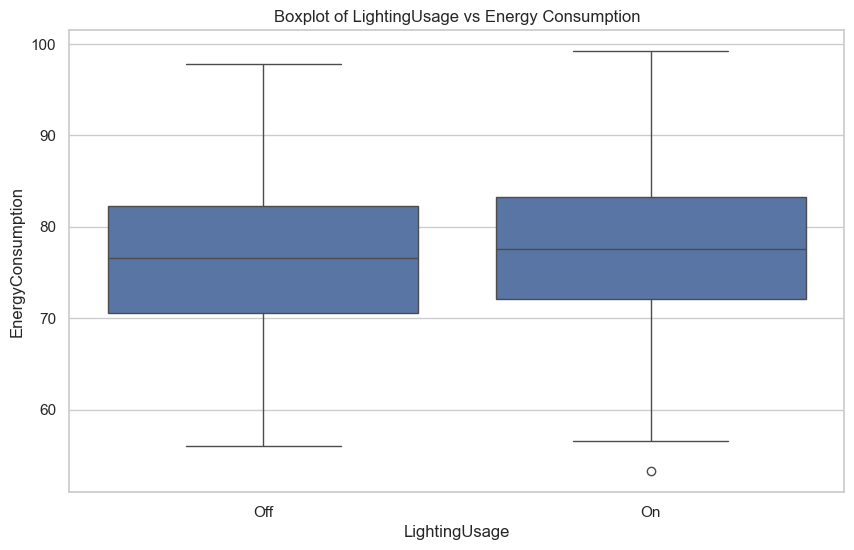

In [7]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='EnergyConsumption', data=raw_data)
    plt.title(f"Boxplot of {col} vs Energy Consumption")
    plt.show()


In [35]:
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64


In [10]:
# Check the column names in the DataFrame
print(data.columns)


Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage',
       'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')


In [14]:
if 'Timestamp' in data.columns:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data['Year'] = data['Timestamp'].dt.year
    data['Month'] = data['Timestamp'].dt.month
    data['Day'] = data['Timestamp'].dt.day
    data['Hour'] = data['Timestamp'].dt.hour
    data['Minute'] = data['Timestamp'].dt.minute
    data['Second'] = data['Timestamp'].dt.second
    data = data.drop(columns=['Timestamp'])
else:
    print("Column 'Timestamp' not found. Available columns are:", data.columns)


In [16]:
X = data.drop(columns=['EnergyConsumption'])  # Features
y = data['EnergyConsumption']  # Target variable
X = pd.get_dummies(X, columns=['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday'], drop_first=True)
print(X.dtypes)  # All should be int or float
X = X.astype(float)

#selected_features = ['Temperature', 'Humidity', 'HVACUsage', 'RenewableEnergy', 'Occupancy', 'SquareFootage']
#X = data[selected_features]
#y = data['EnergyConsumption']

# If there are categorical features, one-hot encode them
#X = pd.get_dummies(X, columns=['HVACUsage', 'RenewableEnergy'], drop_first=True)

# Ensure all data is numeric
#X = X.astype(float)




Temperature            float64
Humidity               float64
SquareFootage          float64
Occupancy                int64
RenewableEnergy        float64
Year                     int32
Month                    int32
Day                      int32
Hour                     int32
Minute                   int32
Second                   int32
HVACUsage_On              bool
LightingUsage_On          bool
DayOfWeek_Monday          bool
DayOfWeek_Saturday        bool
DayOfWeek_Sunday          bool
DayOfWeek_Thursday        bool
DayOfWeek_Tuesday         bool
DayOfWeek_Wednesday       bool
Holiday_Yes               bool
dtype: object


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
import joblib
joblib.dump(rf_model, 'energy_consumption_model.pkl')



['energy_consumption_model.pkl']

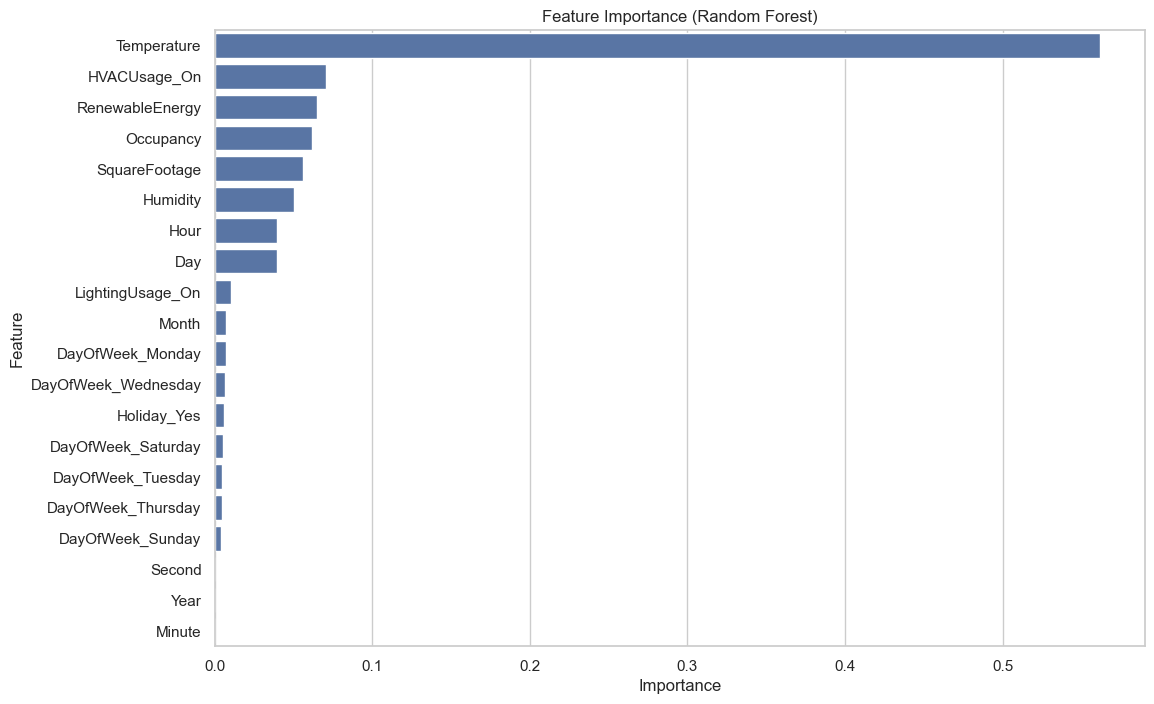

In [19]:
importances = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [20]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, "Test")], early_stopping_rounds=10, verbose_eval=False)

y_pred = xgb_model.predict(dtest)



XGBoost RMSE: 5.61
XGBoost R-squared: 0.52


<Figure size 1000x600 with 0 Axes>

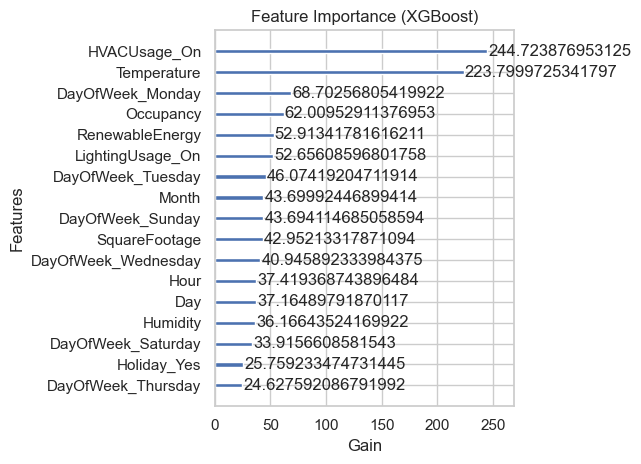

In [21]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)                       # R-squared Score

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R-squared: {r2:.2f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='gain', title='Feature Importance (XGBoost)', xlabel='Gain')
plt.tight_layout()
plt.show()



In [24]:
param_grid = {
    'max_depth': [3, 6, 9],
    'eta': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', verbosity=0)
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters:
{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform  # for sampling distributions
import numpy as np

# Example: Using XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)

# Define parameter distributions (not full grid)
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,                    # number of combinations to try
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020A0F7DECF0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020A190E6990>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020A0F7DE7B0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020A190E60D0>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [27]:
import joblib
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Load the trained model
best_model = joblib.load('energy_consumption_model.pkl')  # Adjust the path if necessary

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE and R²
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.2f}")



RMSE: 5.44
MAE : 4.41
R²  : 0.55


In [29]:
print("Sample Predictions:")
comparison_df = pd.DataFrame({
    'Predicted': y_pred[:10],
    'Actual': y_test.iloc[:10].values
})
print(comparison_df.to_string(index=False))


Sample Predictions:
 Predicted    Actual
 82.368014 86.920611
 80.706127 88.351606
 75.487261 79.431363
 86.911865 90.009188
 75.087746 83.891100
 81.477986 87.549041
 77.471537 79.697237
 72.992939 80.914057
 79.285978 85.133856
 67.777182 71.017140
